# REGRESSION AND DECISION TREE



In [0]:
print('HELLO')

HELLO


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks'

In [0]:
ls

'Copy of TFModelOptimisationGeneric.ipynb'   ssd_inception_v2_coco_2018_01_28/
 housing.data                                T3LAB/
 housing.ipynb


# Boston Housing Dataset


The Boston data frame has 506 rows and 14 columns.This dataframe contains the following columns:


CRIM  = per capita crime rate by town.

ZN = proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS = proportion of non-retail business acres per town.

CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX = nitrogen oxides concentration (parts per 10 million).

RM = average number of rooms per dwelling.

AGE = proportion of owner-occupied units built prior to 1940.

DIS = weighted mean of distances to five Boston employment centres.

RAD = index of accessibility to radial highways.

TAX = full-value property-tax rate per $10,000.

PTRATIO = pupil-teacher ratio by town.

BLACK = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT = lower status of the population (percent).

price = median value of owner-occupied homes in $1000s

** Price is the TARGET variable **

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
boston = load_boston()


In [0]:
type(boston)

sklearn.utils.Bunch

In [0]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
data = boston.data
type(data)

numpy.ndarray

In [0]:
data.shape

(506, 13)

In [0]:
data = pd.DataFrame(data = data, columns= boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [0]:
data.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Data Visualization

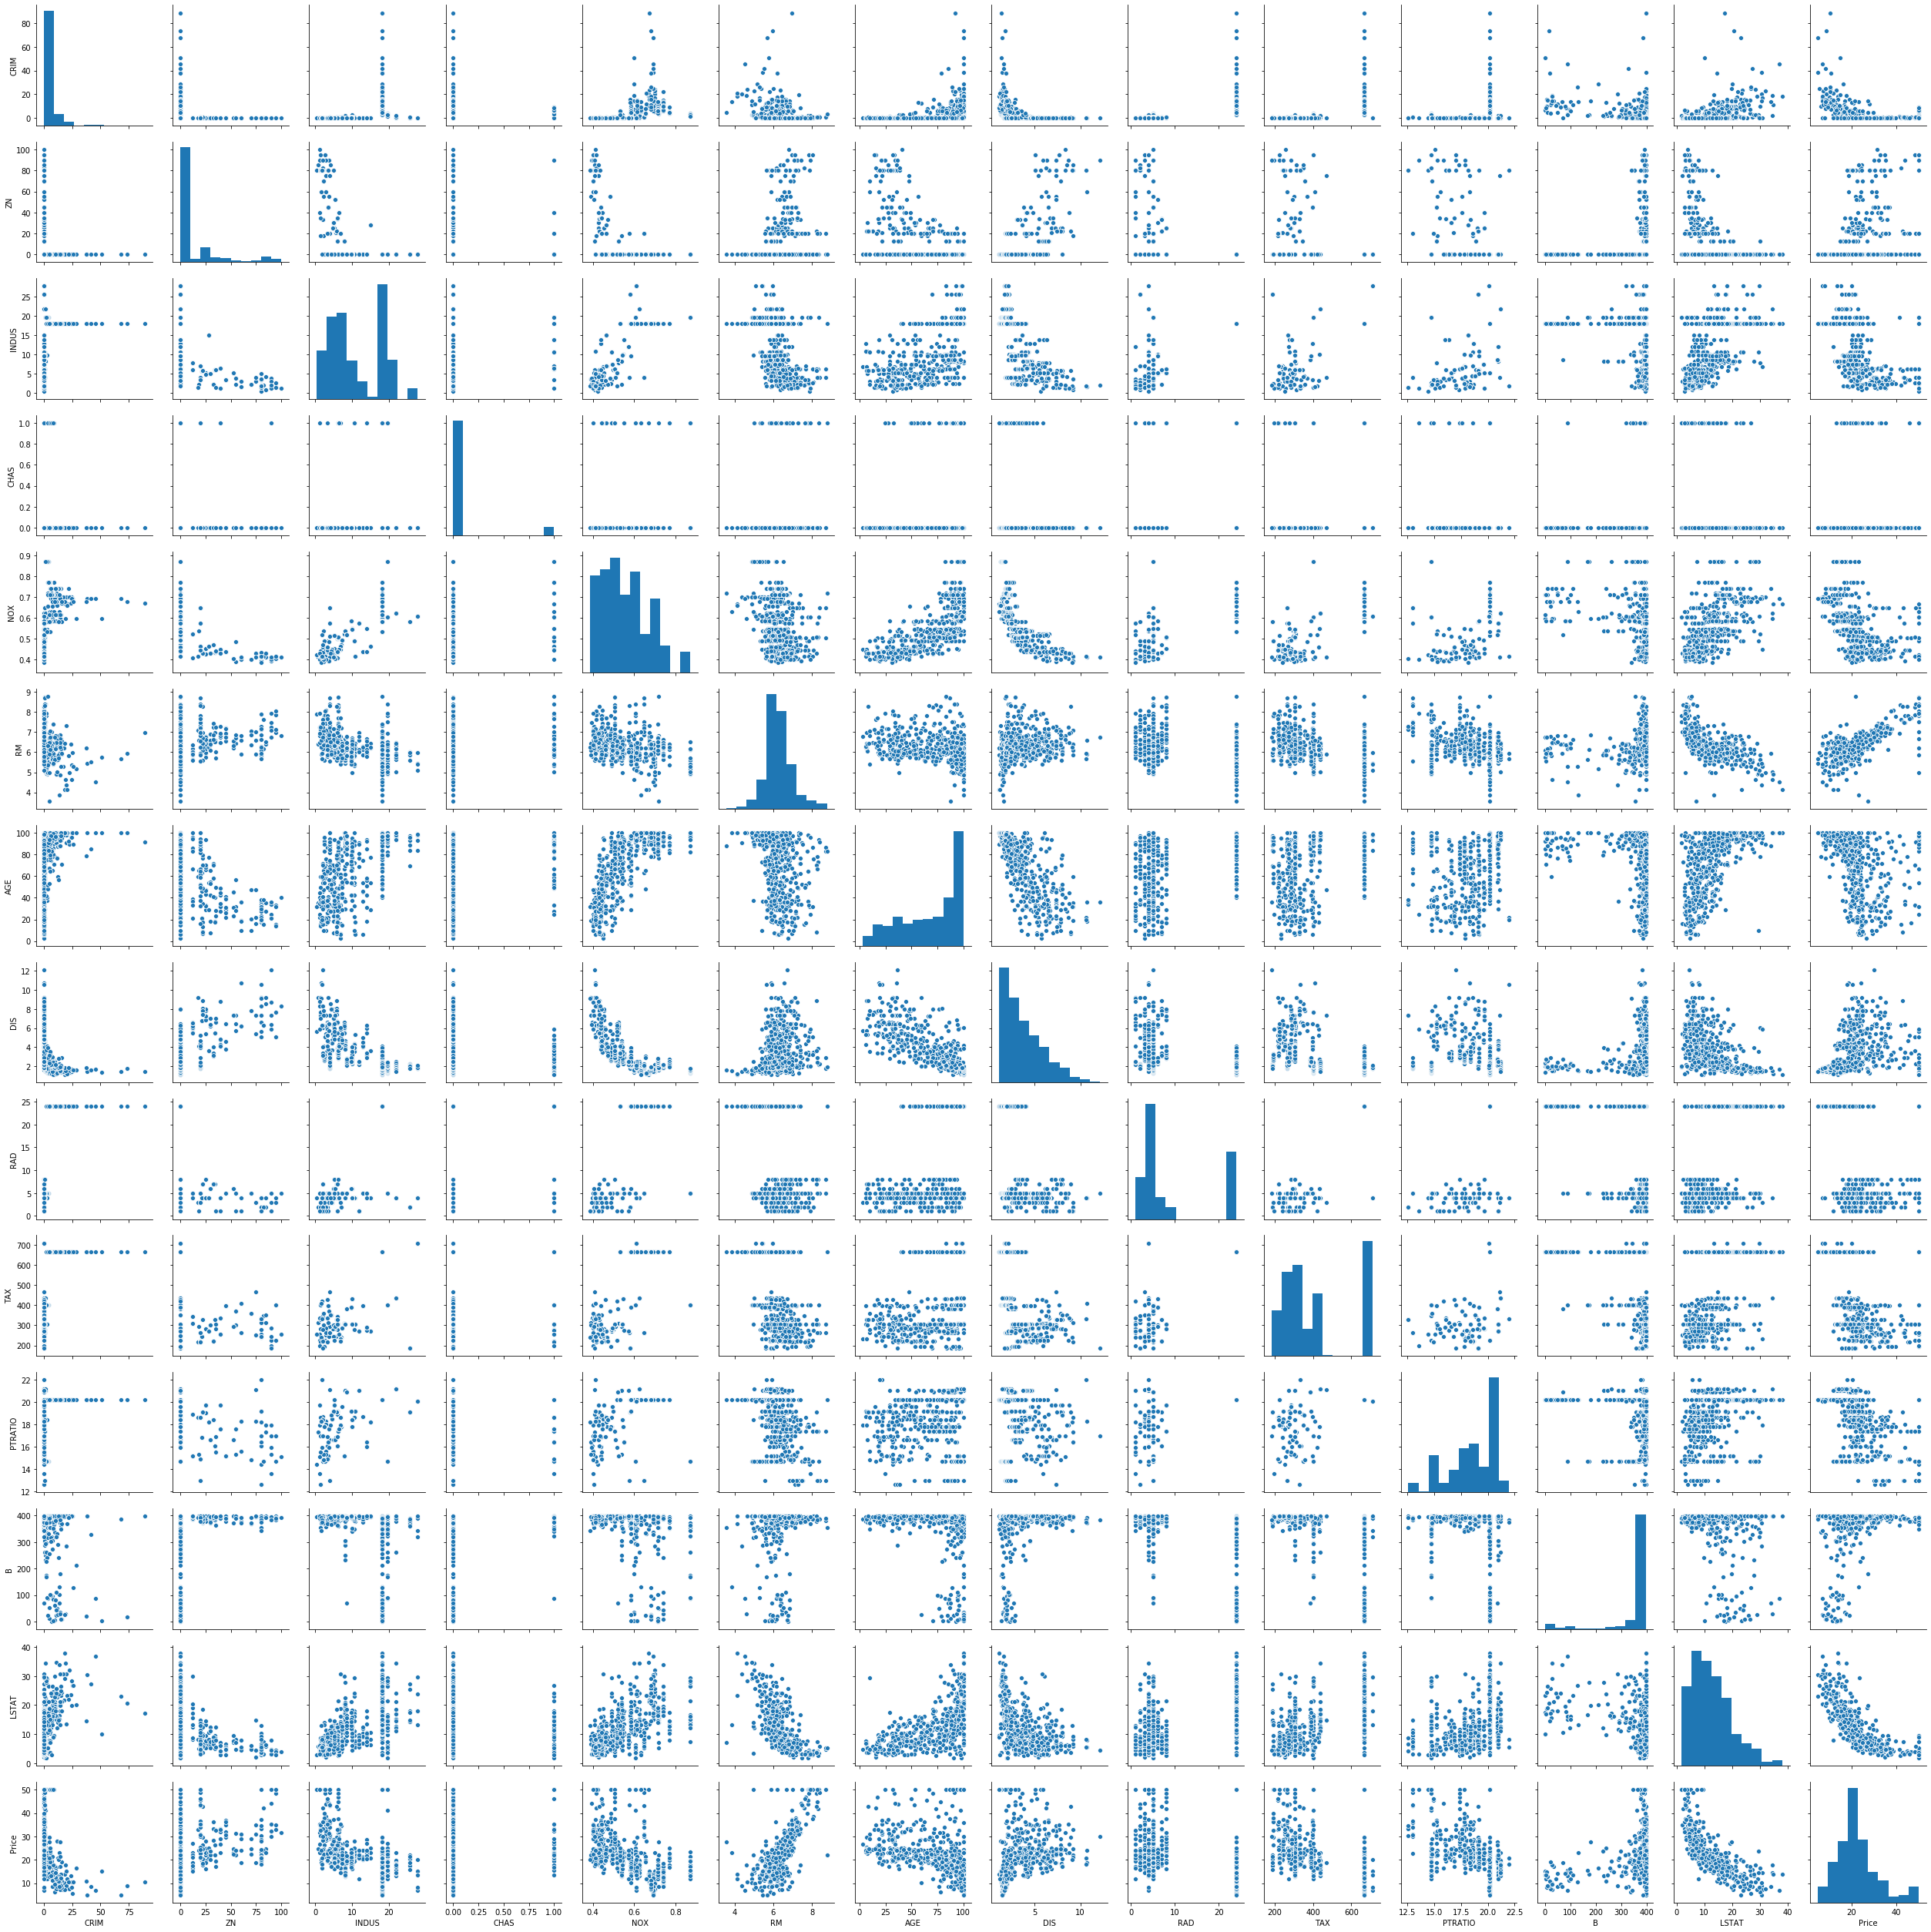

In [0]:
sns.pairplot(data)

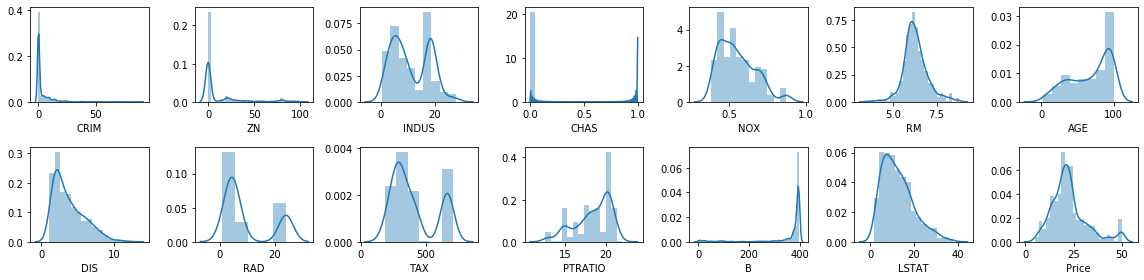

In [0]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

In [0]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


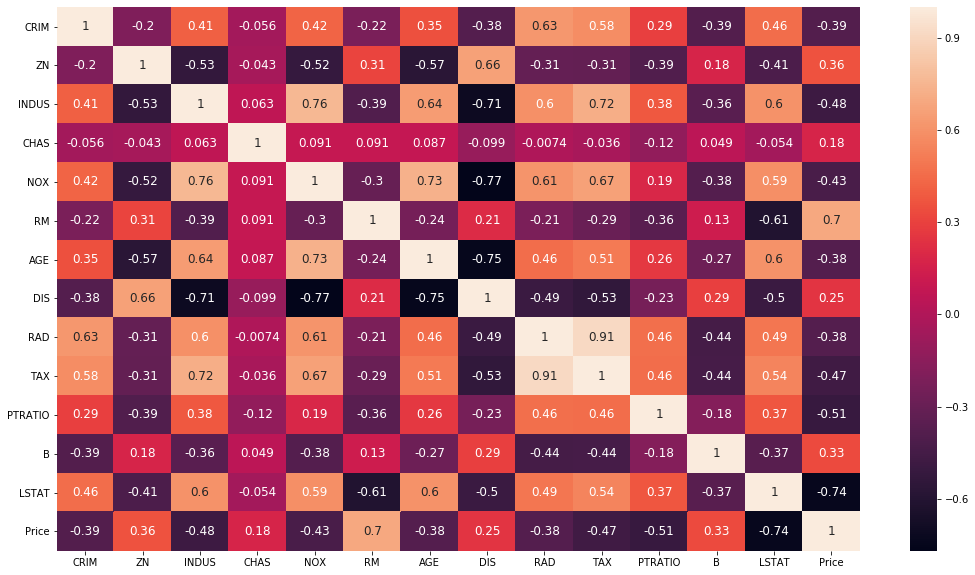

In [0]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

In [0]:
corrmat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [0]:

def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [0]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value


,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [0]:
corr_value.index.values


array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [0]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [0]:
correlated_data.shape

(506, 4)

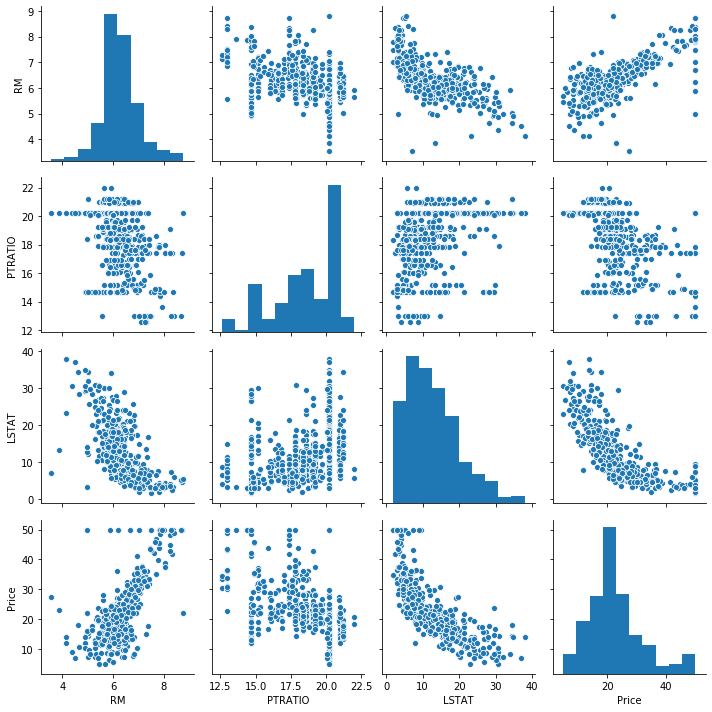

In [0]:
sns.pairplot(correlated_data)
plt.tight_layout()

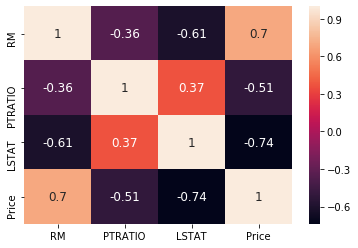

In [0]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12})


## Shuffle and Split Data

In [0]:
X = correlated_data.drop(labels=['Price'], axis = 1)
y = correlated_data['Price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train.shape, X_test.shape

((404, 3), (102, 3))

## Start train the model

In [0]:
model = LinearRegression()
model.fit(X_train, y_train)

In [0]:
y_predict = model.predict(X_test)

In [0]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


## Defining performance metrics


It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict. Assign the performance score to the score variable.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [0]:
from sklearn.metrics import r2_score

In [0]:
correlated_data.columns


Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [0]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.48816420156925067
mae:  4.404434993909257
mse:  41.67799012221683


In [0]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [0]:

def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value],
                                    index = ['features name', '#feature', 'corr_value', 'r2_score', 'MAE', 'MSE'])
    return metrics_dataframe.T

In [0]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678


## regression plot of the features correlated with the price

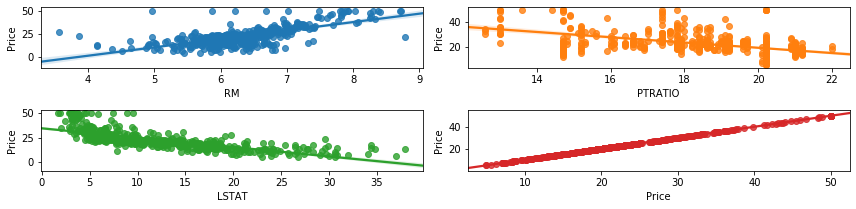

In [0]:
rows = 2
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 3))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index + 1
fig.tight_layout()

### Let's find out other combination of columns to get better accuracy >60%

In [0]:
corrmat['Price']


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [0]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [0]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [0]:
def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['Price'], axis = 1)
    y = corr_data['Price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return y_predict

In [0]:
y_predict = get_y_predict(correlated_data)


In [0]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)


,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831


Let's find out other combination of columns to get better accuracy >70%

In [0]:
corrmat['Price']


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [0]:
threshold = 0.70
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
LSTAT,-0.737663
Price,1.000000


In [0]:
correlated_data = data[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [0]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363


# Normalization and Standardization

Standardization = Gaussian with zero mean and unit variance.

 Z is rescaled such that any specific z will now be 0 ≤ z ≤ 1, and is done through this formula:


$$ z = \frac {x−min(x)} {max(x)−min(x)}$$

In [0]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.4881642015692508

# DECISION TREE

### Important Considerations


| PROS |  CONS  |
| ---- | -----  |
| Easy to visualize and Interpret |  Prone to overfitting |
| No normalization of Data Necessary |  Ensemble needed for better performance |
| Handles mixed feature types    |    |


### Iris Example


**Use measurements to predict species**


![](images/iris.png)
Iris Example
Use measurements to predict species

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [0]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
#split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [0]:
len(X_test)

38

In [0]:
#load classifier
classifier = tree.DecisionTreeClassifier()

In [0]:
#fit train data
classifier = classifier.fit(X_train, y_train)

In [0]:
#examine score
classifier.score(X_train, y_train)

1.0

In [0]:
#against test set
classifier.score(X_test, y_test)

0.9736842105263158

### How would specific flower be classified?

If we have a flower that has:

- Sepal.Length = 1.0
- Sepal.Width = 0.3
- Petal.Length = 1.4
- Petal.Width = 2.1

In [0]:
classifier.predict_proba([[1.0, 0.3, 1.4, 2.1]])

array([[0., 0., 1.]])

In [0]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X_train, y_train, cv=10)

array([1.        , 1.        , 1.        , 1.        , 0.83333333,
       0.83333333, 0.90909091, 1.        , 1.        , 0.88888889])

### How important are different features?

1.   List item
2.   List item

In [0]:
#list of feature importance
classifier.feature_importances_

array([0.        , 0.03796762, 0.39709885, 0.56493354])

In [0]:
importance = classifier.feature_importances_

<BarContainer object of 4 artists>

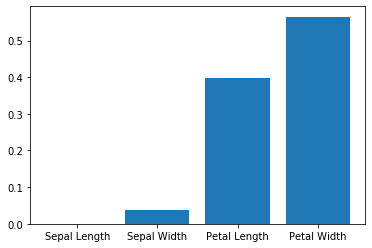

In [0]:
plt.bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], importance)

### Visualizing Decision Tree

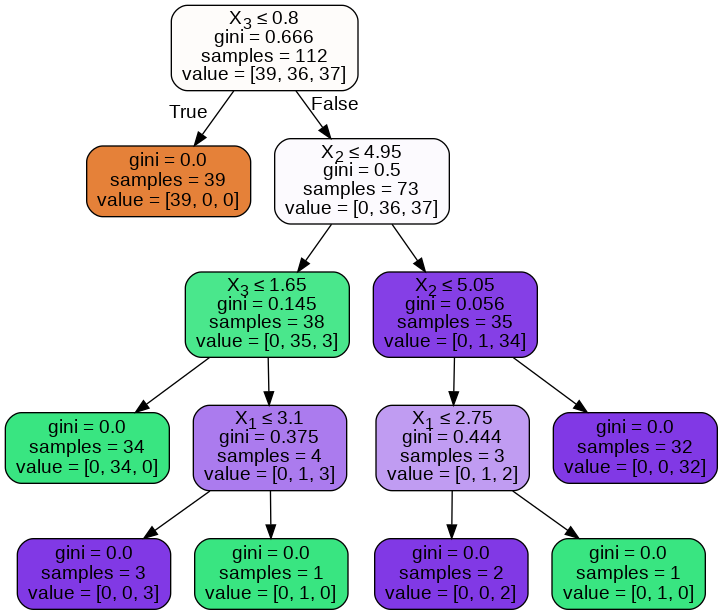

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### What's Happening with Decision Tree

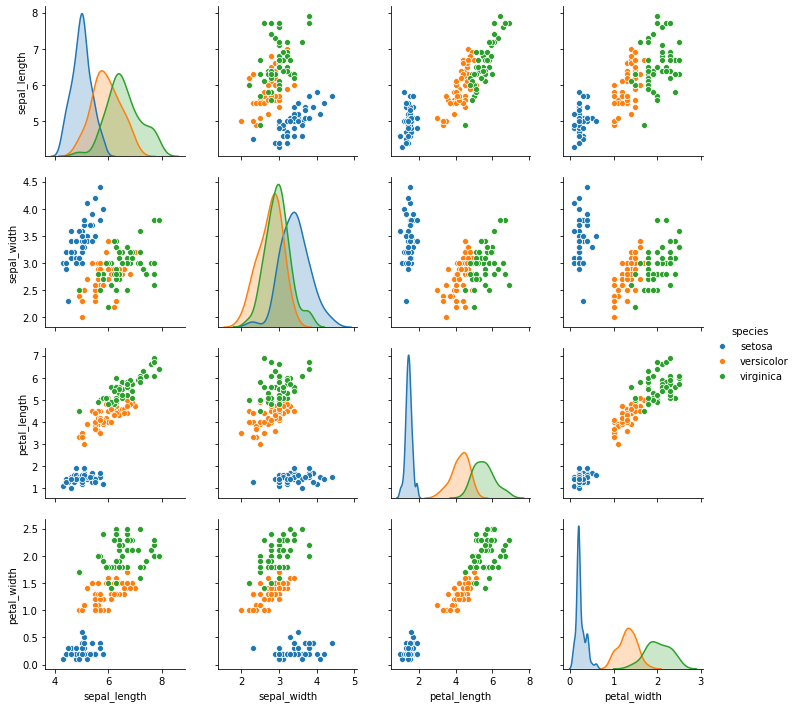

In [0]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(data = iris, hue = 'species');

### Pre-pruning: Avoiding Over-fitting

- `max_depth`: limits depth of tree

- `max_leaf_nodes`: limits how many leafs

- `min_samples_leaf`: limits splits to happen when only certain number of samples exist

In [0]:
classifier = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)

In [0]:
classifier.score(X_train, y_train)

0.6785714285714286

In [0]:
classifier.score(X_test, y_test)

0.631578947368421

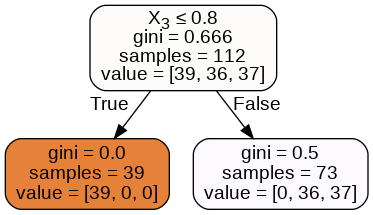

In [0]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
classifier = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [0]:
classifier.score(X_train, y_train)

0.9642857142857143

In [0]:
classifier.score(X_test, y_test)

0.8947368421052632

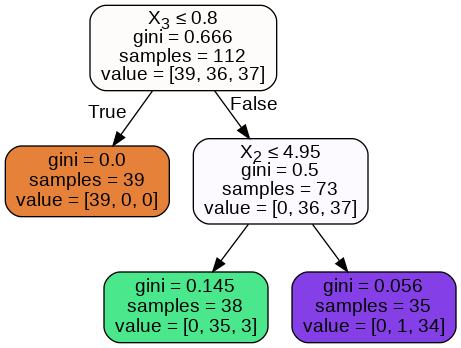

In [0]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
classifier = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
classifier.score(X_train, y_train)

0.9821428571428571

In [0]:
classifier.score(X_test, y_test)

0.9736842105263158

### Confusion Matrix

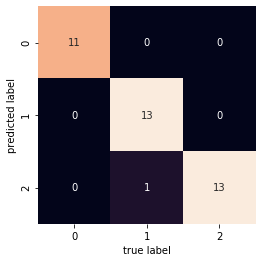

In [0]:
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.metrics import confusion_matrix

classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)

mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 13]])

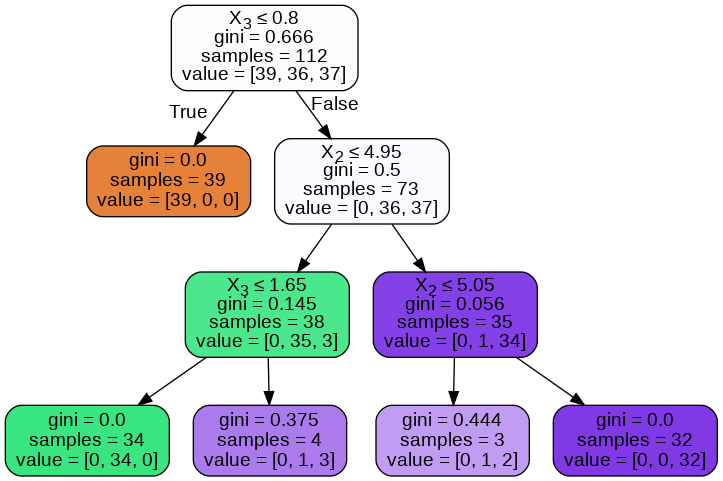

In [0]:
dot_data2 = StringIO()
export_graphviz(classifier, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [0]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.9736842105263158